# Project Name : Pizza Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading the DataSet

In [2]:
df= pd.read_csv("pizza_v2.csv")

In [3]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [4]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

As we can see the data is cleaned and no value is missing. So we can go to analyse data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [6]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In all columns the type is object (string). But we can change the calumn price_rupiah to be a quantitative variable. 

In [7]:
df.rename({'price_rupiah':'price'}, axis=1, inplace=True)
df.price = df.price.str.replace('Rp','').str.replace(',','').astype(int)
df['diameter'] = df['diameter'].str.extract('(\d+\.?\d*)').astype(float) 

In [8]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


### Data Analysis

In [9]:
!pip install plotly.express

  Obtaining dependency information for plotly.express from https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl.metadata


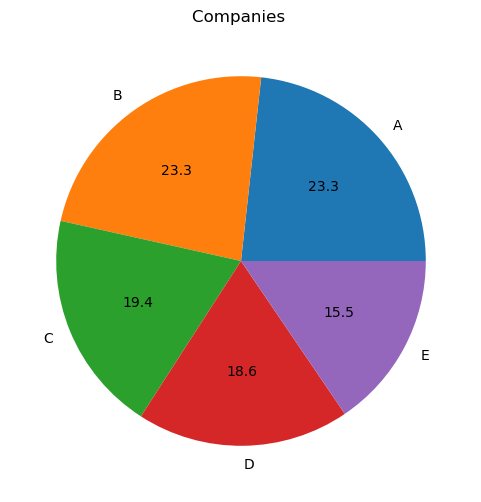

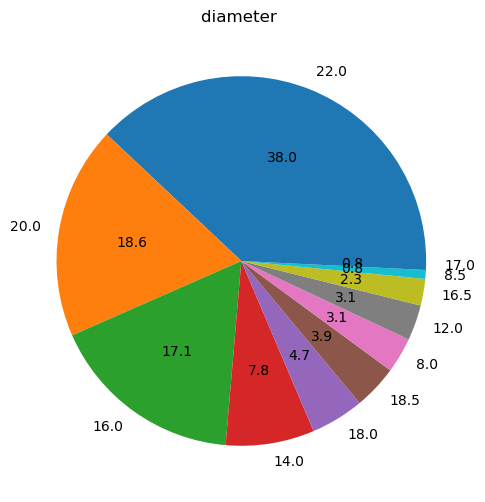

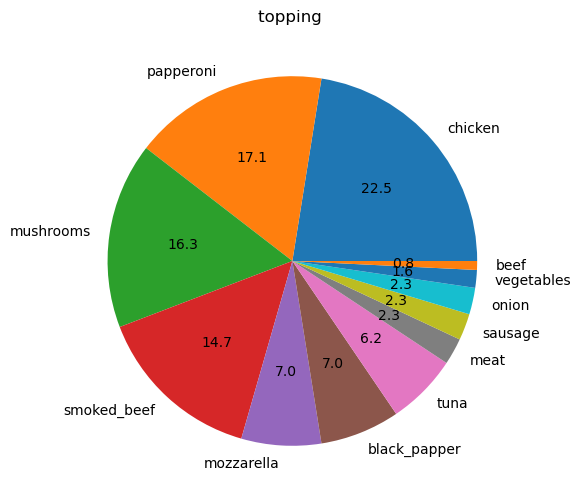

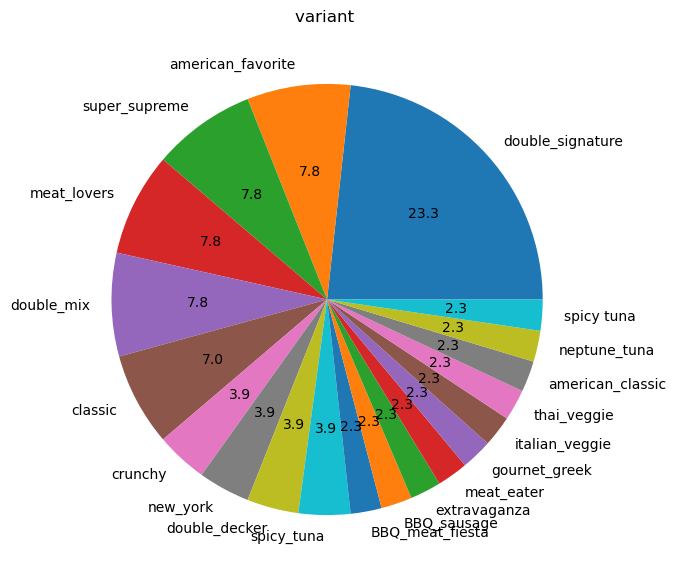

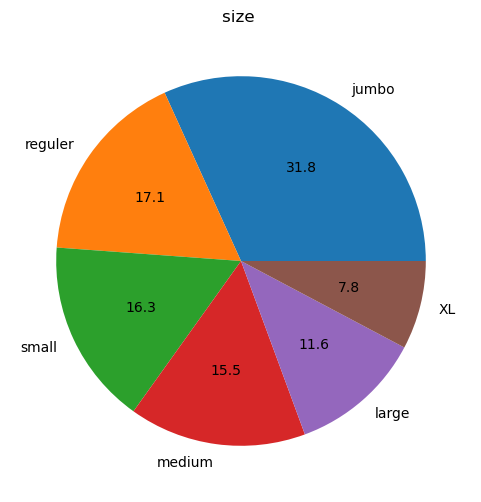

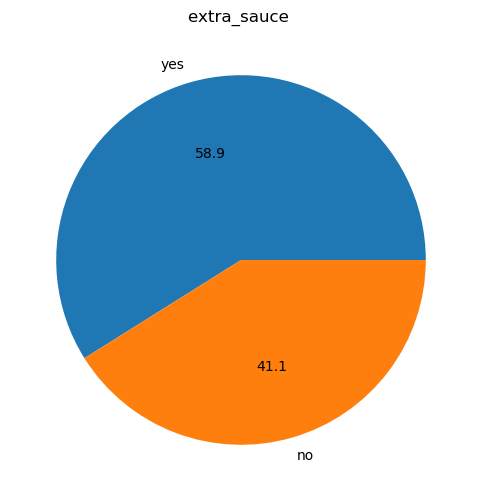

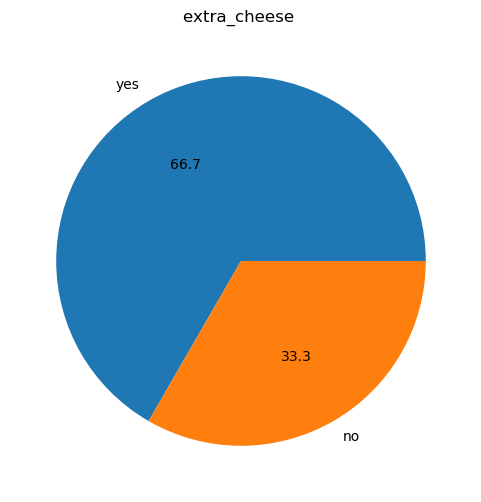

In [11]:
import plotly.express as px
plt.figure(figsize=(6,6))
plt.pie(df['company'].value_counts(),autopct='%.1f', labels= df['company'].unique())
plt.title('Companies ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['diameter'].value_counts(),autopct='%.1f', labels= df['diameter'].unique())
plt.title('diameter ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['topping'].value_counts(),autopct='%.1f', labels= df['topping'].unique())
plt.title('topping ')
plt.show()

plt.figure(figsize=(7,7))
plt.pie(df['variant'].value_counts(),autopct='%.1f', labels= df['variant'].unique())
plt.title('variant ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['size'].value_counts(),autopct='%.1f', labels= df['size'].unique())
plt.title('size ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_sauce'].value_counts(),autopct='%.1f', labels= df['extra_sauce'].unique())
plt.title('extra_sauce ')
plt.show()

plt.figure(figsize=(6,6))
plt.pie(df['extra_cheese'].value_counts(),autopct='%.1f', labels= df['extra_cheese'].unique())
plt.title('extra_cheese ')
plt.show()

Let's look at ome points in different point.

<Axes: xlabel='company', ylabel='Count'>

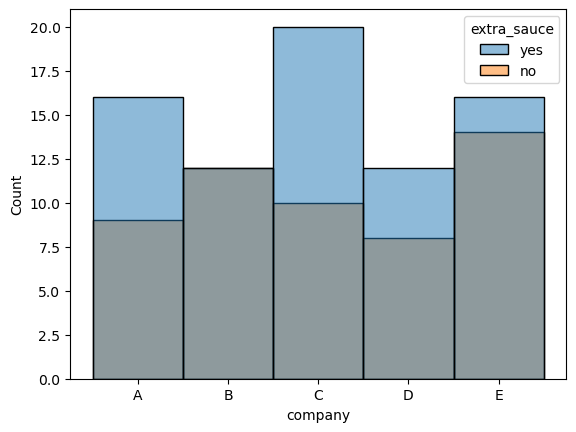

In [19]:
sns.histplot(data=df, x="company",hue='extra_sauce')

In company 'C' more people take extra_sauce and it's the highest value. In company 'B' no one is taking that one so it's no necessairly to have various type of sauce if nobody takes extra. 

C:\Users\48606\AppData\Local\Temp\ipykernel_9968\4077994148.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['company'].value_counts(), color='g', shade=True)


<Axes: xlabel='count', ylabel='Density'>

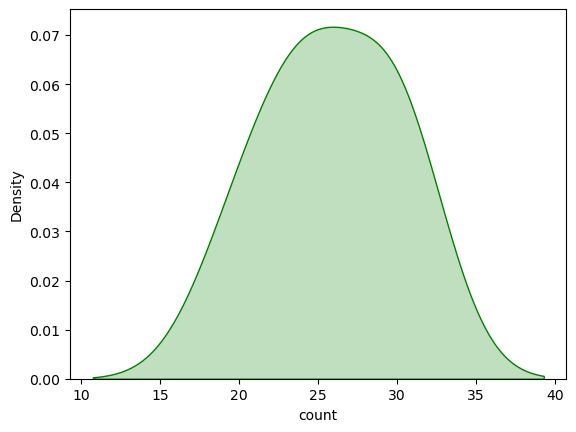

In [20]:
df_company=df.groupby('company').agg({'company':['count']})
sns.kdeplot(df['company'].value_counts(), color='g', shade=True)

C:\Users\48606\AppData\Local\Temp\ipykernel_9968\2455695138.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)


<Axes: xlabel='count', ylabel='Density'>

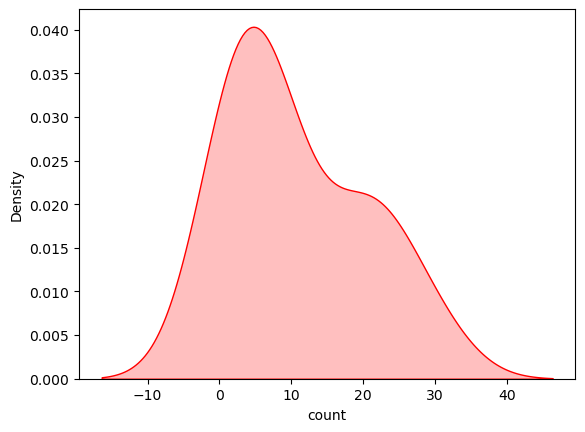

In [23]:
df_company=df.groupby('topping').agg({'topping':['count']})
sns.kdeplot(df['topping'].value_counts(), color='r', shade=True)

<Axes: xlabel='company', ylabel='Count'>

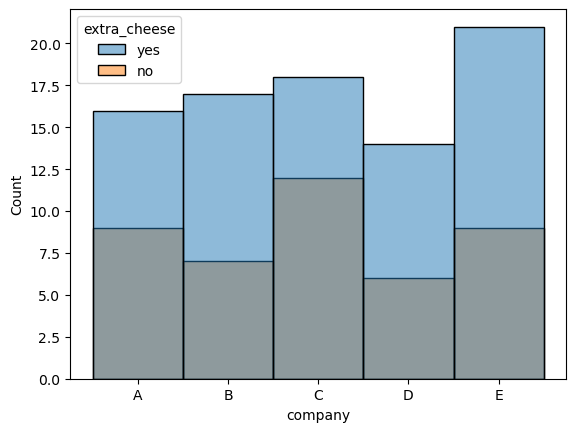

In [22]:
sns.histplot(data=df, x="company",hue='extra_cheese')

If we look to extra_cheese we can see that 60% take it. It's the most common in company 'E' where more than half of customers want it. 

<Axes: xlabel='company', ylabel='Count'>

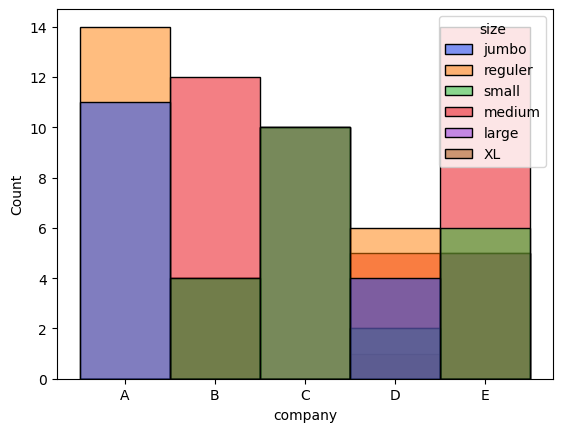

In [27]:
sns.histplot(data=df, x="company",hue='size',palette='bright')

When we look at size the most popular in company 'A' is jumbo. In company 'C' all of people take XL size. We can notice that this company has the lowest variety of size or extra_sauce because all of customers takes the same. 

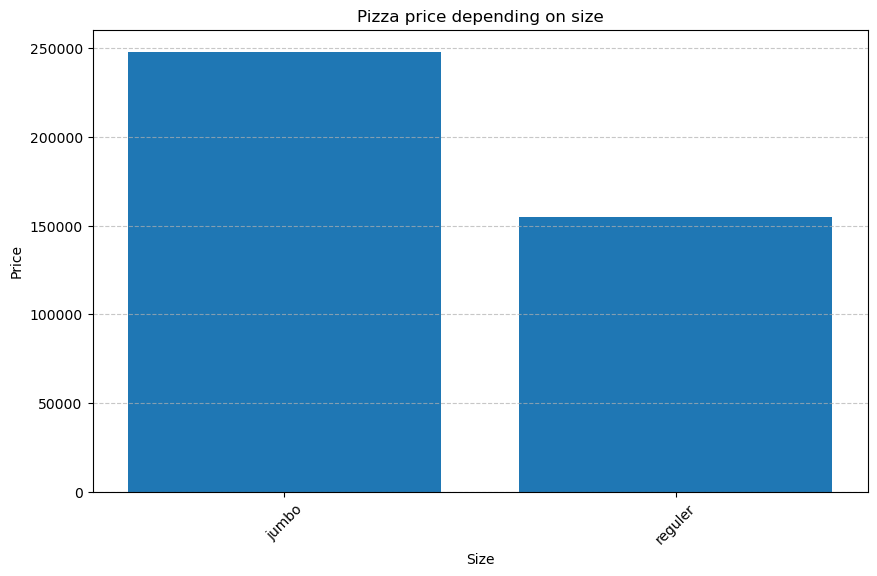

In [48]:
#sns.histplot(data=df, x='price',bins=30)
df_company_a = df[df['company'] == 'A']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

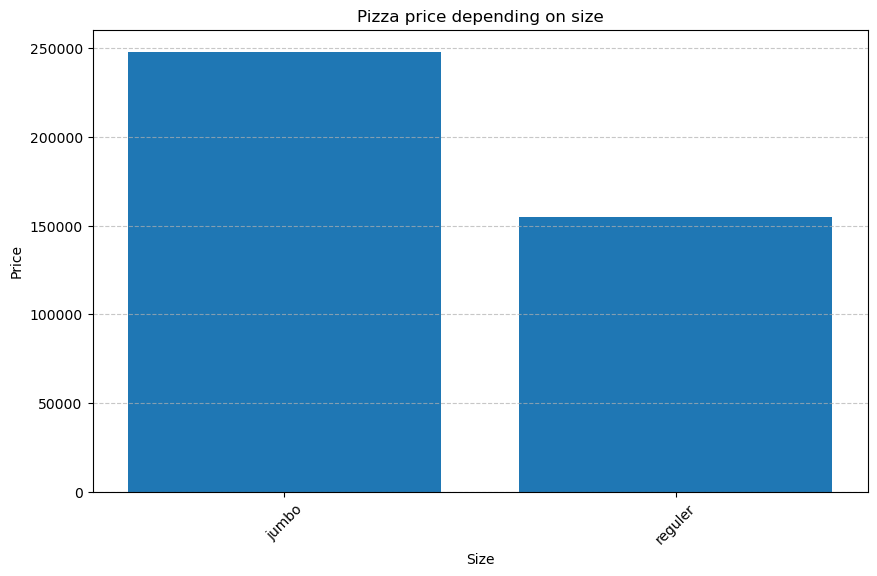

In [49]:
df_company_a = df[df['company'] == 'A']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.show()

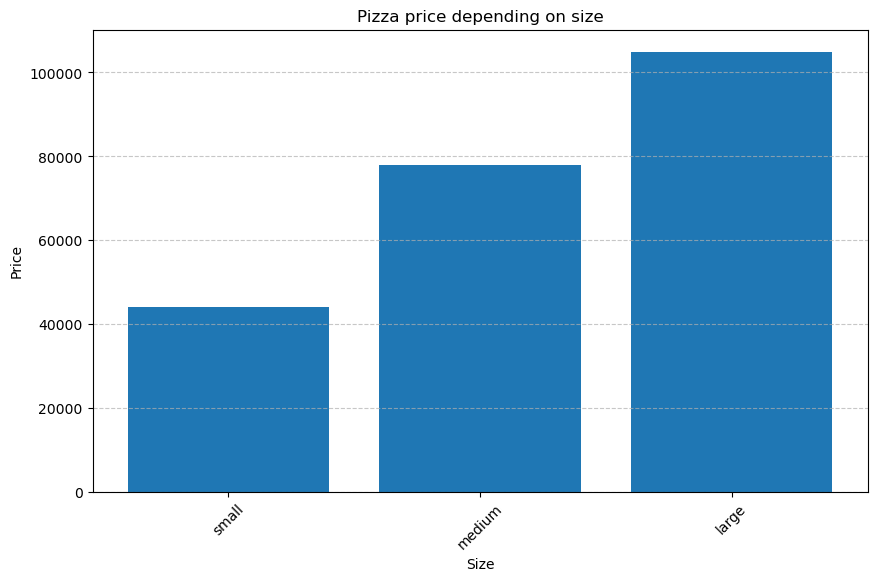

In [50]:
df_company_a = df[df['company'] == 'C']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

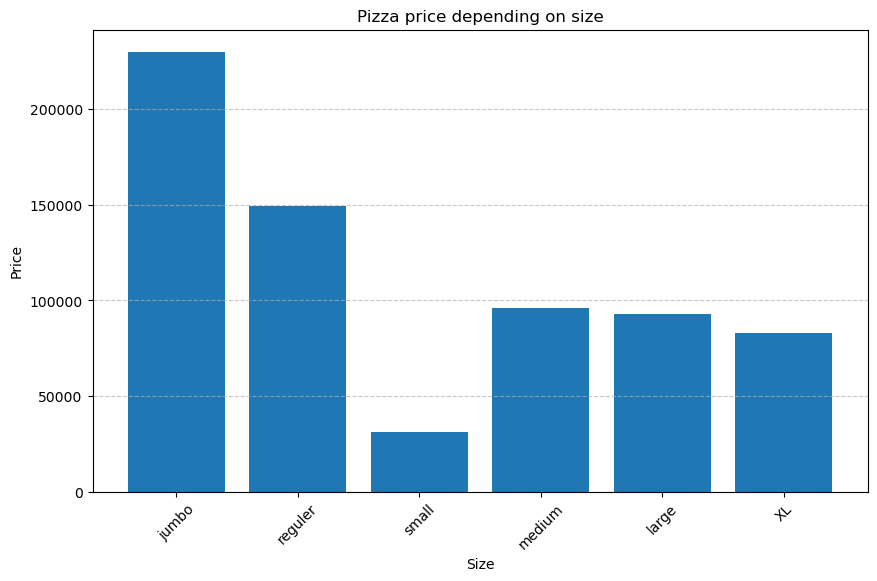

In [51]:
df_company_a = df[df['company'] == 'D']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

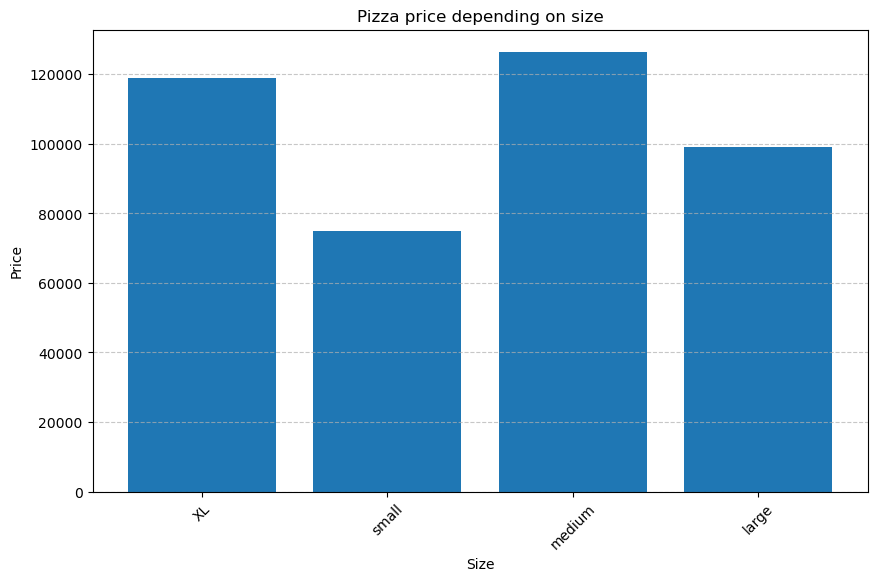

In [53]:
df_company_a = df[df['company'] == 'E']

plt.figure(figsize=(10, 6))
plt.bar(df_company_a['size'], df_company_a['price'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Pizza price depending on size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

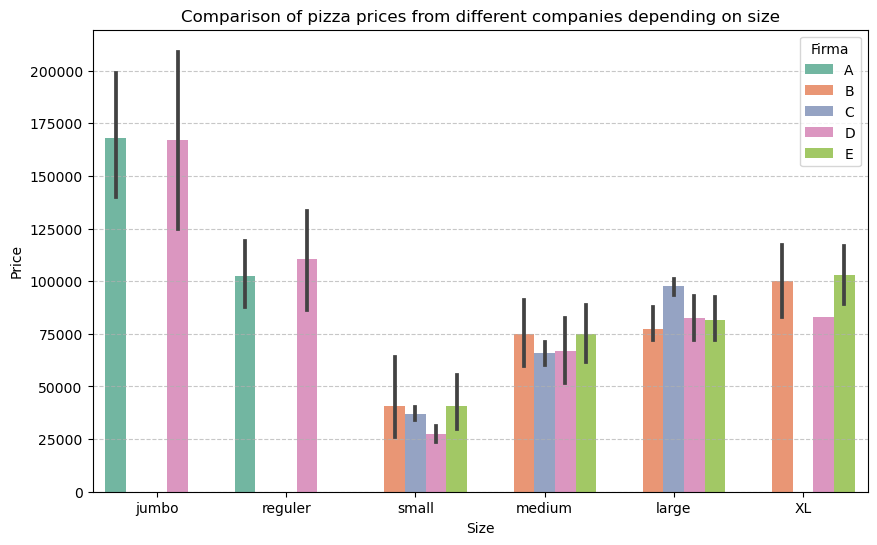

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='size', y='price', hue='company', palette='Set2')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Comparison of pizza prices from different companies depending on size')
plt.legend(title='Firma')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
As we can see the price of jumbo and regular pizza in company 'A' and 'D' are simmilar. The bigest deifferent we can notice in small size and XL.

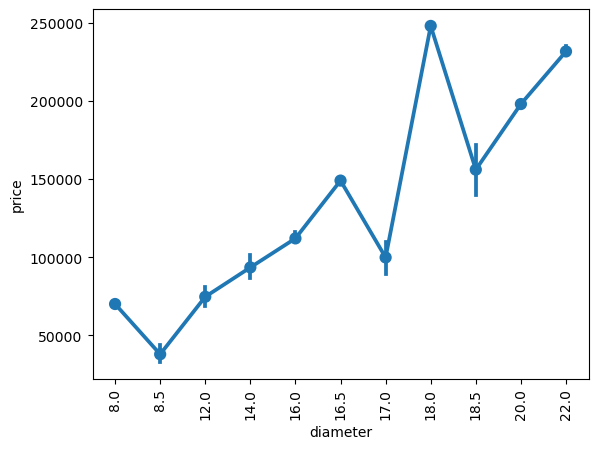

In [29]:
sns.pointplot(data=df.sort_values(by='diameter'),
              x='diameter', y='price')
plt.xticks(rotation=90);

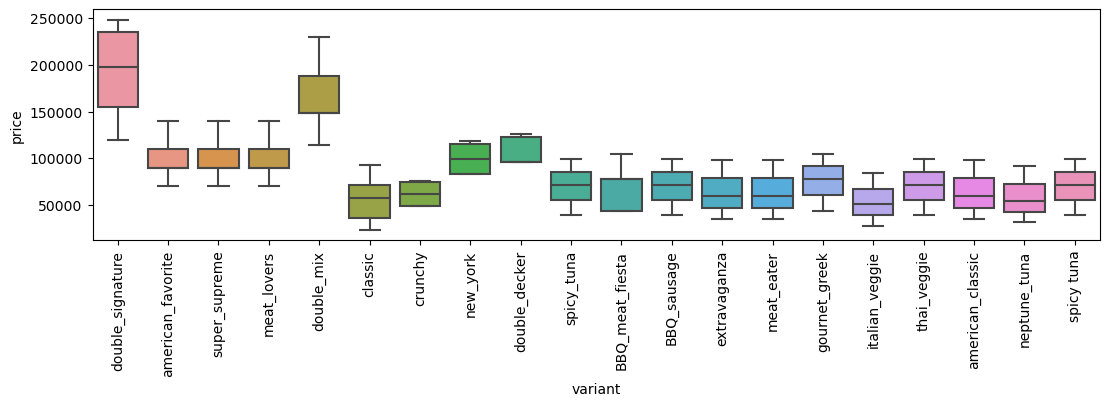

In [30]:
plt.figure(figsize=(13,3))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

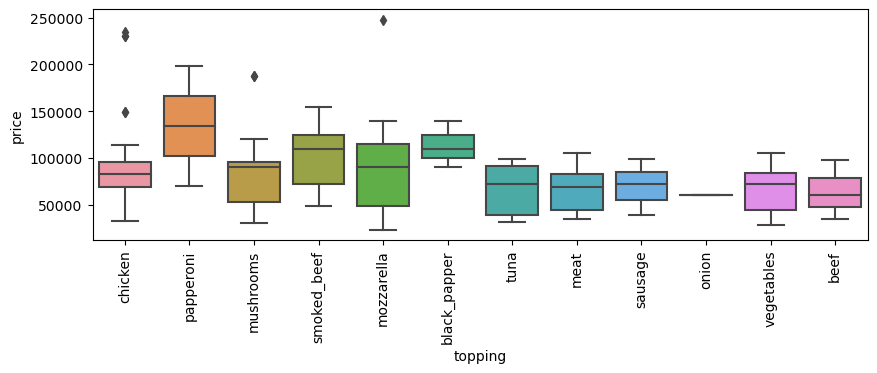

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=90)
plt.show()

#### One Hot Encoding

The functions one_hot_encoding and one_hot use the category_encoders library to encode each specified column into a one-hot format, where each category becomes a binary column. This transformation is commonly used in machine learning preprocessing to handle categorical data.

In [56]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
def one_hot_encoding(df,col):
    one_hot_encoder=ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True)
    df_final = one_hot_encoder.fit_transform(df)
    return df_final
def one_hot(df, column):
    df = one_hot_encoding(df,column)
    return df

In [57]:
df = one_hot(df, 'company')
df = one_hot(df, 'topping')
df = one_hot(df, 'variant')
df = one_hot(df, 'size')
df = one_hot(df, 'extra_sauce')
df = one_hot(df, 'extra_cheese')

In [58]:
df = one_hot(df, 'extra_mushrooms')

In [59]:
df.head()

,company_A,company_B,company_C,company_D,company_E,price,diameter,topping_chicken,topping_papperoni,topping_mushrooms,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
0,1,0,0,0,0,235000,22.0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,198000,20.0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,0,120000,16.0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,0,155000,14.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,1,0,0,0,0,248000,18.0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [60]:
df.dtypes

company_A                      int64
company_B                      int64
company_C                      int64
company_D                      int64
company_E                      int64
price                          int32
diameter                     float64
topping_chicken                int64
topping_papperoni              int64
topping_mushrooms              int64
topping_smoked_beef            int64
topping_mozzarella             int64
topping_black_papper           int64
topping_tuna                   int64
topping_meat                   int64
topping_sausage                int64
topping_onion                  int64
topping_vegetables             int64
topping_beef                   int64
variant_double_signature       int64
variant_american_favorite      int64
variant_super_supreme          int64
variant_meat_lovers            int64
variant_double_mix             int64
variant_classic                int64
variant_crunchy                int64
variant_new_york               int64
v

In [61]:
x = df.drop("price",axis = 1)
y = df["price"]

In [62]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2)

## Model Building using ML Algorithms


In [63]:
from xgboost import XGBRegressor

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid= {'n_estimators':[2000,4000,6000],
             'max_depth':[3,4,5,6],
             'learning_rate':[0.01,0.1,0.2,0.3,0.5]
}

In [66]:
final = GridSearchCV(XGBRegressor(random_state=42),
                                    param_grid=param_grid,
                                    scoring='r2')

In [67]:
X_train.head()

,company_A,company_B,company_C,company_D,company_E,diameter,topping_chicken,topping_papperoni,topping_mushrooms,topping_smoked_beef,...,size_small,size_medium,size_large,size_XL,extra_sauce_yes,extra_sauce_no,extra_cheese_yes,extra_cheese_no,extra_mushrooms_no,extra_mushrooms_yes
27,0,1,0,0,0,14.0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,1
94,0,0,0,1,0,12.0,1,0,0,0,...,0,1,0,0,0,1,1,0,1,0
77,0,0,1,0,0,12.0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
37,0,1,0,0,0,8.5,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
63,0,0,1,0,0,14.0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


## Fitting the model to training data

In [68]:
final.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [2000, 4000, 6000]},
             scoring='r2')

In [69]:
final.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 2000}

In [70]:
Best_param= {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 2000}

In [71]:
xgb= XGBRegressor(learning_rate= 0.2,max_depth= 6, n_estimators= 2000)

In [72]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
pred= xgb.predict(X_test)

In [75]:
from sklearn import metrics

In [76]:
mae = metrics.mean_absolute_error(pred, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 3749.01442
RMSE: 8213.48860
r2 score: 0.96111


he results indicate that the XGBoost model fits the data very well. A high R2R2 suggests that the model successfully explains most of the variability in the data, even though MAE and RMSE show that forecast errors can still be significant across data units.

## SVR

In [77]:
from sklearn.svm import SVR

In [79]:
svr= SVR()

In [80]:
svr.fit(X_train,Y_train)

SVR()

In [81]:
pred1= svr.predict(X_test)

In [82]:
mae = metrics.mean_absolute_error(pred1, Y_test)
print(f'MAE: {mae:.5f}')

rsme = metrics.mean_squared_error(pred1, Y_test, squared=False)
print(f'RMSE: {rsme:.5f}')

r2_score = metrics.r2_score(pred1, Y_test)
print(f'r2 score: {r2_score:.5f}')

MAE: 38454.07584
RMSE: 49325.35513
r2 score: -68659918.71260


MAE says that the model predictions are on average deviated from actual values ​​by this amount. This is a very high error, which means the model is not effective

